<a href="https://colab.research.google.com/github/W5Wesley/CreditRisk/blob/main/Credit_Risk_LCDataDictionary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_loan = pd.read_csv("/content/drive/MyDrive/My_Project/Credit Risk/loan_data_2007_2014.csv")

In [5]:
data_loan.sample(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
339948,339948,22121470,24424410,10000,10000,10000.0,36 months,11.67,330.57,B,...,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,NaN,NaN,NaN
276205,276205,31487469,34080668,8000,8000,8000.0,36 months,13.35,270.91,C,...,NaN,NaN,NaN,NaN,NaN,NaN,5150.0,NaN,NaN,NaN
147509,147509,4288673,5481169,3825,3825,3825.0,36 months,6.62,117.45,A,...,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,NaN
123127,123127,5799896,7231660,7125,7125,7125.0,36 months,13.68,242.41,C,...,NaN,NaN,NaN,NaN,NaN,NaN,25200.0,NaN,NaN,NaN
314266,314266,17793243,19925790,20000,20000,20000.0,60 months,14.49,470.47,C,...,NaN,NaN,NaN,NaN,NaN,NaN,26900.0,NaN,NaN,NaN
179132,179132,2378567,2841008,16000,16000,16000.0,36 months,11.14,524.89,B,...,NaN,NaN,NaN,NaN,NaN,NaN,64000.0,NaN,NaN,NaN
122486,122486,5875809,7337949,31300,31300,31250.0,60 months,17.56,787.35,D,...,NaN,NaN,NaN,NaN,NaN,NaN,40500.0,NaN,NaN,NaN
100668,100668,6786099,8408216,32250,32250,32250.0,60 months,17.56,811.24,D,...,NaN,NaN,NaN,NaN,NaN,NaN,35000.0,NaN,NaN,NaN
373081,373081,18585383,17432387,7500,7500,7500.0,36 months,8.39,236.38,A,...,NaN,NaN,NaN,NaN,NaN,NaN,26100.0,NaN,NaN,NaN
70827,70827,8595134,10347243,8900,8900,8850.0,36 months,8.90,282.61,A,...,NaN,NaN,NaN,NaN,NaN,NaN,21300.0,NaN,NaN,NaN


In [6]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
for column in data_loan.columns:
    if data_loan[column].isnull().sum()/466285 > 0.8:
        data_loan.drop(column, axis=1, inplace=True)

In [8]:
columns = []
for column in data_loan.columns:
    columns.append(column)
print(columns)

['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [9]:
missing_col = []
for column in data_loan.columns:
    if data_loan[column].isnull().any() == True:
        missing_col.append(column)
print(len(missing_col))

22


In [10]:
data_loan[missing_col].isnull().sum()

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340302
title                              20
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
dtype: int64

#Feature Selection

In [11]:
credit_risk_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status','last_pymnt_amnt','dti','purpose','loan_status']
data_loan[credit_risk_columns].head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,last_pymnt_amnt,dti,purpose,loan_status
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,171.62,27.65,credit_card,Fully Paid
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,119.66,1.00,car,Charged Off
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,649.91,8.72,small_business,Fully Paid
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,357.48,20.00,other,Fully Paid
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,67.79,17.94,other,Current


In [12]:
credit_risk_data = data_loan[credit_risk_columns]
credit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   term                 466285 non-null  object 
 2   int_rate             466285 non-null  float64
 3   installment          466285 non-null  float64
 4   grade                466285 non-null  object 
 5   emp_length           445277 non-null  object 
 6   home_ownership       466285 non-null  object 
 7   annual_inc           466281 non-null  float64
 8   verification_status  466285 non-null  object 
 9   last_pymnt_amnt      466285 non-null  float64
 10  dti                  466285 non-null  float64
 11  purpose              466285 non-null  object 
 12  loan_status          466285 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 46.2+ MB


In [13]:
credit_risk_data.sample(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,last_pymnt_amnt,dti,purpose,loan_status
49845,11875,36 months,15.61,415.21,C,< 1 year,RENT,35000.0,Not Verified,415.21,15.16,credit_card,Charged Off
36925,15200,36 months,12.21,263.19,B,1 year,OWN,50000.0,Verified,6649.93,7.25,other,Fully Paid
290478,21000,36 months,10.99,687.42,B,4 years,RENT,99000.0,Source Verified,687.42,5.35,debt_consolidation,Current
316751,28500,36 months,12.99,960.15,C,4 years,RENT,65000.0,Verified,960.15,28.80,debt_consolidation,Current
351223,28000,36 months,8.39,882.47,A,< 1 year,RENT,103000.0,Source Verified,900.00,22.43,credit_card,Current
98678,3000,36 months,18.85,109.75,D,10+ years,RENT,60000.0,Source Verified,115.98,25.98,vacation,Current
389376,30000,36 months,17.57,1078.12,D,1 year,MORTGAGE,167000.0,Source Verified,1078.12,14.87,debt_consolidation,Current
153877,25000,60 months,19.05,649.21,D,5 years,OWN,68000.0,Verified,19477.59,32.82,debt_consolidation,Fully Paid
151741,28000,60 months,23.63,799.51,F,3 years,RENT,150000.0,Source Verified,21595.64,14.04,debt_consolidation,Fully Paid
166741,15850,36 months,18.49,576.92,D,5 years,RENT,41000.0,Verified,323.13,30.50,credit_card,Charged Off


#Data Cleaning

In [14]:
credit_risk_data.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             21008
home_ownership             0
annual_inc                 4
verification_status        0
last_pymnt_amnt            0
dti                        0
purpose                    0
loan_status                0
dtype: int64

In [15]:
#fill missing value with 0
credit_risk_data.fillna(0, inplace=True)
credit_risk_data.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
last_pymnt_amnt        0
dti                    0
purpose                0
loan_status            0
dtype: int64

In [16]:
#Categories label column
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

In [17]:
#create function to apply new catergory in label
def classify_label(text):
    for condition, label in label_categories:
        if any(match in text for match in label):
            return condition
    return None

In [18]:
credit_risk_data.loc[:, 'label'] = credit_risk_data['loan_status'].apply(classify_label)
credit_risk_data = credit_risk_data.drop('loan_status', axis=1)

In [19]:
credit_risk_data.sample(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,last_pymnt_amnt,dti,purpose,label
234696,16000,60 months,11.44,351.40,B,< 1 year,OWN,150000.0,Not Verified,351.40,9.05,debt_consolidation,0
67531,24000,36 months,10.99,785.62,B,1 year,RENT,86000.0,Verified,1000.00,13.30,debt_consolidation,0
370020,12700,60 months,19.52,333.09,E,< 1 year,OWN,30240.0,Source Verified,338.64,27.42,debt_consolidation,0
70942,4900,36 months,8.90,155.60,A,8 years,MORTGAGE,43000.0,Not Verified,2228.84,11.89,debt_consolidation,0
335309,18000,60 months,17.57,452.89,D,2 years,MORTGAGE,106000.0,Source Verified,18217.62,9.02,debt_consolidation,0
205060,19750,60 months,22.95,556.20,F,10+ years,RENT,51000.0,Verified,556.20,13.01,debt_consolidation,1
55356,15875,60 months,20.20,422.36,D,5 years,RENT,95000.0,Verified,422.36,9.04,small_business,0
386219,12000,36 months,9.17,382.55,B,4 years,RENT,45000.0,Not Verified,9711.88,16.96,credit_card,0
154814,6000,36 months,19.05,220.09,D,0,MORTGAGE,35400.0,Verified,4883.80,34.20,debt_consolidation,0
150401,2000,36 months,18.75,73.06,D,10+ years,MORTGAGE,29000.0,Not Verified,73.06,26.98,debt_consolidation,0


##Univariate Analysis

In [20]:
numerical_data = credit_risk_data.select_dtypes(exclude='object')
categorical_data = credit_risk_data.select_dtypes(include='object')

##Numerical Analysis

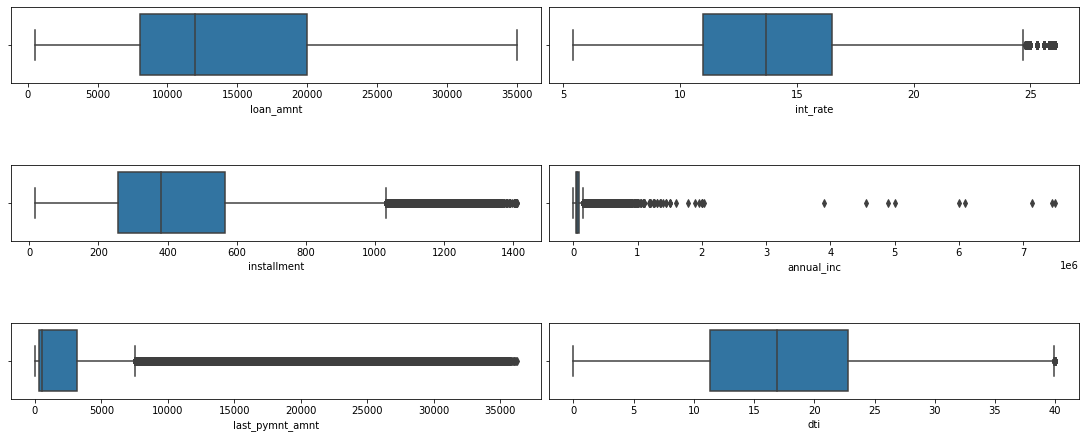

In [21]:
fig, axs = plt.subplots (ncols=2, nrows=3,figsize=(15,6))
index = 0
axs = axs.flatten()
for k,v in numerical_data.iloc[:,:-1].items():
    sns.boxplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##Categorical Analysis

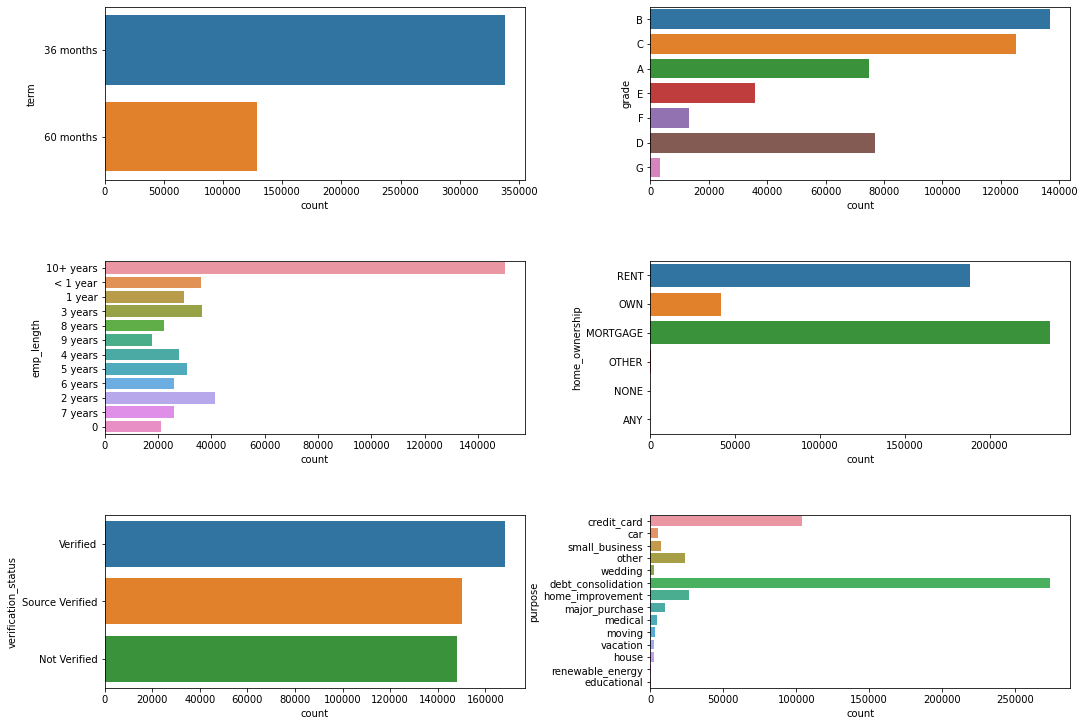

In [22]:
fig, axs = plt.subplots (ncols=2, nrows=3,figsize=(15,10))
index = 0
axs = axs.flatten()
for k,v in categorical_data.items():
    sns.countplot(y=v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

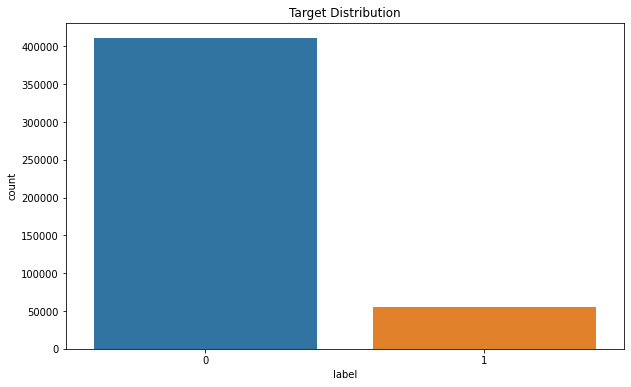

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=credit_risk_data, x='label').set_title('Target Distribution');

Data is inbalance!

##Multivariate Analysis

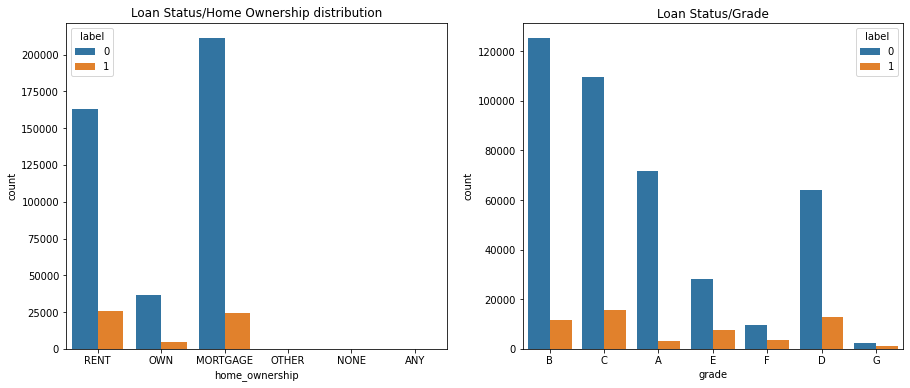

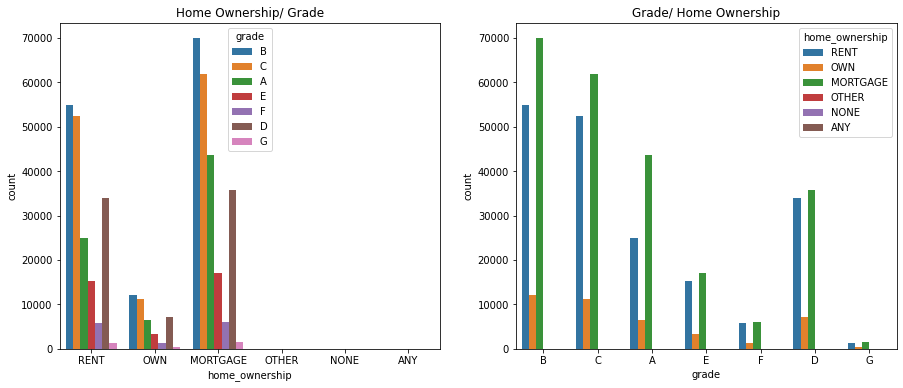

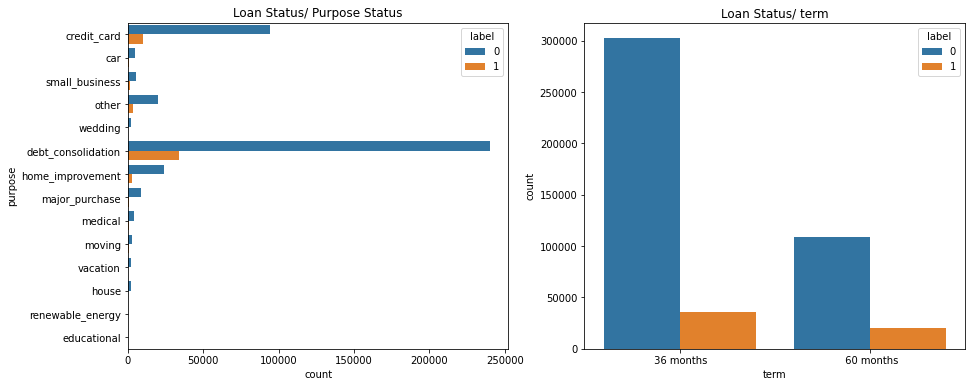

In [24]:
#Distribution with target
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=credit_risk_data, x='home_ownership', hue='label', ax=ax[0]).set_title("Loan Status/Home Ownership distribution");
sns.countplot(data=credit_risk_data, x='grade', hue='label', ax=ax[1]).set_title("Loan Status/Grade");

fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=credit_risk_data, x='home_ownership', hue='grade', ax=ax[0]).set_title("Home Ownership/ Grade");
sns.countplot(data=credit_risk_data, x='grade', hue='home_ownership', ax=ax[1]).set_title("Grade/ Home Ownership");

fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=credit_risk_data, y='purpose', hue='label', ax=ax[0]).set_title("Loan Status/ Purpose Status");
sns.countplot(data=credit_risk_data, x='term', hue='label', ax=ax[1]).set_title("Loan Status/ term");

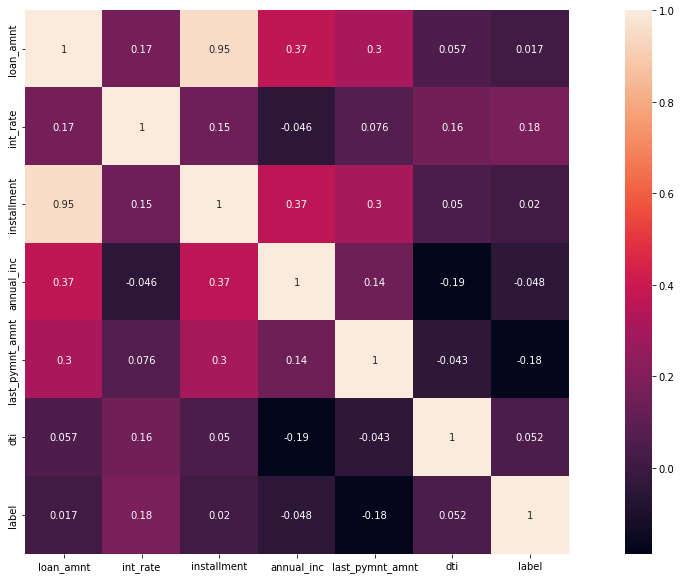

In [25]:
#Heat map Correlations
plt.figure(figsize = (20,10))
sns.heatmap(credit_risk_data.corr(),square = True, annot=True)
plt.show()

#Transform Data

In [26]:
#Transform term label
def condition_term(condition):
    if condition == " 36 months":
        return 36
    else:
        return 60

In [27]:
credit_risk_data['term'] = credit_risk_data['term'].apply(condition_term)

In [28]:
cat_columns = []
for cat in categorical_data.columns:
    cat_columns.append(cat)

In [29]:
cat_columns.pop(0)
cat_columns.remove('emp_length')


In [30]:
credit_risk_data.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,last_pymnt_amnt,dti,purpose,label
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,171.62,27.65,credit_card,0
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,119.66,1.00,car,1
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,649.91,8.72,small_business,0
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,357.48,20.00,other,0
4,3000,60,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,67.79,17.94,other,0


In [31]:
print(cat_columns)

['grade', 'home_ownership', 'verification_status', 'purpose']


In [32]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [33]:
credit_risk_data[cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                466285 non-null  object
 1   home_ownership       466285 non-null  object
 2   verification_status  466285 non-null  object
 3   purpose              466285 non-null  object
dtypes: object(4)
memory usage: 14.2+ MB


In [34]:
#Apply Label encoding
for column in cat_columns:
    credit_risk_data[column] = LE.fit_transform(credit_risk_data[column])

In [35]:
#labeling emp_length
def emp_length(time):
    if time == "< 1 year":
        return 1
    elif time == "1 year":
        return 2
    elif time == "2 years":
        return 3
    elif time == "3 years":
        return 4
    elif time == "4 years":
        return 5
    elif time == "5 years":
        return 6
    elif time == "6 years":
        return 7
    elif time == "7 years":
        return 8
    elif time == "8 years":
        return 9
    elif time == "9 years":
        return 10
    elif time == "10 years":
        return 11
    elif time == "10+ years":
        return 12
    else:
        return 0
credit_risk_data['emp_length'] = credit_risk_data['emp_length'].apply(emp_length)

In [36]:
credit_risk_data.sample(20)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,last_pymnt_amnt,dti,purpose,label
78221,5375,36,16.20,189.51,2,0,1,20000.0,2,189.51,30.90,9,0
346280,30000,36,12.49,1003.47,1,12,1,100000.0,1,1003.47,23.18,2,0
119773,30750,60,16.78,760.59,2,4,5,68500.0,2,760.59,18.60,2,0
185268,35000,60,12.12,780.68,1,12,5,215000.0,2,780.68,6.95,2,0
172114,20125,36,12.12,669.60,1,12,5,44858.0,2,669.60,26.02,2,0
444019,3500,36,13.98,119.59,2,12,1,40000.0,2,0.58,16.23,2,0
89276,14750,60,21.70,404.87,4,5,4,59150.0,2,13095.99,8.33,4,0
416758,12000,60,12.99,272.98,1,5,1,535000.0,2,272.98,1.61,2,0
131785,10000,36,17.77,360.38,3,6,5,98000.0,1,360.38,19.33,2,1
64992,8000,36,12.99,269.52,1,3,5,50000.0,0,269.52,5.26,2,1


#Inbalance handling

In [37]:
#Split X, y file for training preparation
X = credit_risk_data.drop(['label'], axis=1)
y = credit_risk_data['label']

In [38]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [39]:
#Split data for test and training data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [40]:
#Apply Inbalance handling using SMOTE
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train)

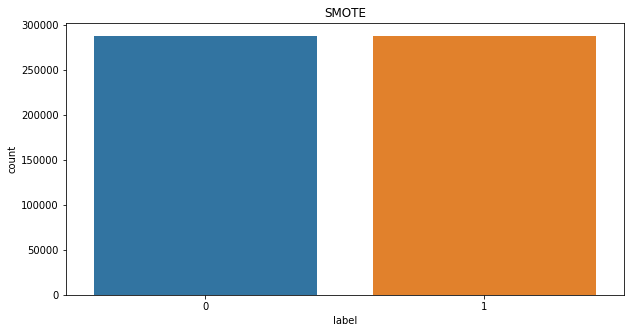

In [41]:
plt.figure(figsize = (10,5))
sns.countplot(y_train)
plt.title("SMOTE")
plt.show()

#Modeling

In [42]:
# Using GridsearchCV + Random forest for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)

In [43]:
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# Use Recall for credit risk
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [44]:
# Result
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
19,"{'max_depth': 4, 'n_estimators': 50}",0.881195,1
15,"{'max_depth': 4, 'n_estimators': 10}",0.880583,2
18,"{'max_depth': 4, 'n_estimators': 40}",0.879788,3
16,"{'max_depth': 4, 'n_estimators': 20}",0.878700,4
17,"{'max_depth': 4, 'n_estimators': 30}",0.876345,5
20,"{'max_depth': 5, 'n_estimators': 10}",0.873982,6
21,"{'max_depth': 5, 'n_estimators': 20}",0.870286,7
23,"{'max_depth': 5, 'n_estimators': 40}",0.866239,8
22,"{'max_depth': 5, 'n_estimators': 30}",0.865697,9
24,"{'max_depth': 5, 'n_estimators': 50}",0.865655,10


In [47]:
# Classification Report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75    123105
           1       0.21      0.76      0.33     16781

    accuracy                           0.64    139886
   macro avg       0.58      0.69      0.54    139886
weighted avg       0.86      0.64      0.70    139886



Model able to detect Credit risk with accuracy 64% and recall 62% for good label(0) and 76% with bad label(1)

##Feature Importance

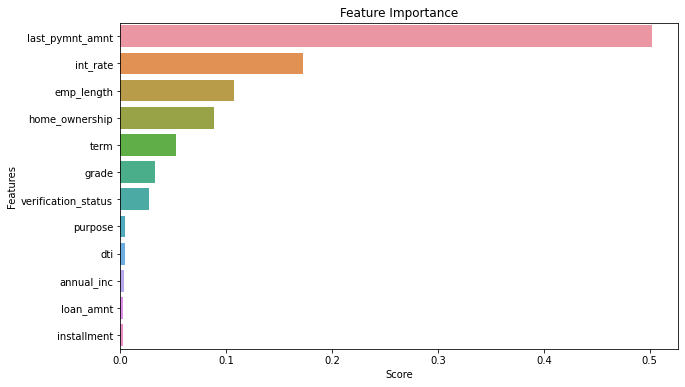

In [49]:
from sklearn.inspection import permutation_importance
feature = pd.Series(rf_clf_gridcv.best_estimator_.feature_importances_, index = X_train.columns).sort_values(ascending = False)
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()